# Определение перспективного тарифа для телеком компании

### Шаг 1. Откроем файл с данными и изучим общую информацию.

In [1]:
import pandas as pd # импортируем библиотеку pandas
import numpy as np # сразу импортируем библиотеку numpy
import matplotlib.pyplot as plt # библиотеку matplotlib
from scipy import stats as st # и scipy
data_calls = pd.read_csv('/datasets/calls.csv') #  читаем csv файл
print(data_calls.info()) # выведем общую информацию о таблице
display(data_calls.head(10)) # выведем первые 10 строк таблицы
#Таблица calls (информация о звонках)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [2]:
# data_internet = pd.read_csv('/datasets/internet.csv',index_col = 'mb_used')
data_internet = pd.read_csv('/datasets/internet.csv') # код ревьюера
print(data_internet.info())
display(data_internet.head(10))
#Таблица internet (информация об интернет-сессиях)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [3]:
data_messages = pd.read_csv('/datasets/messages.csv')
print(data_messages.info())
display(data_messages.head(10))
#Таблица messages (информация о сообщениях)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [4]:
# при открытии этой таблицы зададим с помощью index_col индексы названиям тарифоф в столбце tariff_name
data_tariffs = pd.read_csv('/datasets/tariffs.csv',index_col = 'tariff_name')
print(data_tariffs.info())
display(data_tariffs)
#Таблица tariffs (информация о тарифах)

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, smart to ultra
Data columns (total 7 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
dtypes: int64(7)
memory usage: 128.0+ bytes
None


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
tariff_name,,,,,,,
smart,50,15360,500,550,200,3,3
ultra,1000,30720,3000,1950,150,1,1


In [5]:
data_users = pd.read_csv('/datasets/users.csv')
print(data_users.info())
display(data_users.head(10))
#Таблица users (информация о пользователях)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


### Вывод:

Открыли файлы и изучили общую информацию о них.Каждая таблица содержит определнную информацию; Таблица users (информацию о пользователях),Таблица tariffs (информацию о тарифах),Таблица internet (информацию об интернет-сессиях), Таблица messages (информацию о сообщениях),Таблица calls (информацию о звонках).Радует,что в таблицах не много пропущенных значений,однако есть другие проблемы.Самая главная - невозможность обьеденить таблицы для дальнейшего анализа ,тк на один звонок приклеются все смс за год, что сделает анализ невозможным.Сначала необходимо сгруппровать и предобработать данные отдельно и только потом обьединять .Также необходимо привести столбцы с датами к нужному типу, проверить на наличие дубликатов, разобраться со звонками продолжительностью 0 минут и многое другое.Всем этим мы будем заниматься в рамках следующего шага.

### Шаг 2. Подготовим данные

#### Приведем данные к нужным типам

In [6]:
# приведем все столбцы с датами в каждой таблице к специальному типу datetime методом pd.to_datetime()

print(data_calls['call_date'].isnull().sum())#убедимся еще раз ,что в столбце нет пропущенных значений,чтобы не привести nan к dt
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'])# применяем метод к столбцу
print(data_calls.info())# убедимся в замене

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB
None


In [7]:
# длительность звонков duration имеет тип float,но мы значем, что оператор всегда взымает плату за полные минуты.
# Поэтому округлим длительность звонком в большую сторону
data_calls['duration'] = np.ceil(data_calls['duration'])

In [8]:
data_internet#['session_date']

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


In [9]:
print(data_internet['session_date'].isnull().sum())#убедимся еще раз ,что в столбце нет пропущенных значений,чтобы не привести nan к dt
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'])# применяем метод к столбцу
print(data_internet.info())# убедимся в замене

#сразу удалим ненужный столбец Unnamed 0 в этой таблице 
data_internet = data_internet.drop('Unnamed: 0', 1)# применяем drop()

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB
None


In [10]:
print(data_messages['message_date'].isnull().sum())#убедимся еще раз ,что в столбце нет пропущенных значений,чтобы не привести nan к dt
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'])# применяем метод к столбцу
print(data_messages.info())# убедимся в замене

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB
None


In [11]:
print(data_users['reg_date'].isnull().sum())#убедимся еще раз ,что в столбце нет пропущенных значений,чтобы не привести nan к dt
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'])# применяем метод к столбцу
print()
# пропущенные значения в столбце churn_date означают,что тариф ещё действовал на момент выгрузки данных
print((data_users['churn_date'] == 0).sum()) #проверим на наличие нулей в столбце
data_users['churn_date'] = data_users['churn_date'].fillna(0)#для удобства заменим nan в этом столбце на 0
print(data_users.info())# убедимся в замене типа данных и пропущенных значений 

0

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    500 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB
None


#### Проверим на наличие очевидных дубликатов 

In [12]:
print(data_calls[data_calls.duplicated(keep = False)])
print(data_users[data_users.duplicated(keep = False)])
print(data_messages[data_messages.duplicated(keep = False)])
print(data_internet[data_internet.duplicated(keep = False)])

Empty DataFrame
Columns: [id, call_date, duration, user_id]
Index: []
Empty DataFrame
Columns: [user_id, age, churn_date, city, first_name, last_name, reg_date, tariff]
Index: []
Empty DataFrame
Columns: [id, message_date, user_id]
Index: []
Empty DataFrame
Columns: [id, mb_used, session_date, user_id]
Index: []


#### Проанализируем нулевые значения в длительности звонка 

In [13]:
# выведем подробную информацию о столбце duration()
data_calls['duration'].describe()

count    202607.000000
mean          7.158198
std           5.959173
min           0.000000
25%           2.000000
50%           6.000000
75%          11.000000
max          38.000000
Name: duration, dtype: float64

In [14]:
# хотя бы нет отрицательных значений 
# посмотрим сколько точно 0 значений во всем столбце
null_calls = (data_calls['duration'] == 0 ).sum()
# сколько это % от всего датасета ?
null_calls_part = len(data_calls) / null_calls
print("{0:.0f}%".format(null_calls_part))

5%


* 5% - это не много.Однако численно это около 10 тысяч.Столбец содержит длительность разговора в минутах.Очевидно , что это не одноразовый выброс.Нам известно ,что «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.То есть на эти звонки вообще никто не отвечал, тк даже если бы они были по 1 секунде , в столбце были бы 1.Принимаю решение оставить нулевые значения и рассматривать их как пропущенные.Они составляют не существенную часть от общего набора данных и могут быть использованы в дальнейшем анализе. 

#### Cоздадим таблицу ,где на каждого юзера будет каждый месяц

In [15]:
#добавим столбец reg_month c месяцем регистрации пользователя с помощью [M],получив первый день месяца
data_users['reg_month'] = data_users['reg_date'].values.astype('datetime64[M]')

In [16]:
#data_internet.groupby(['user_id, 'month'], as_index = False).agg({'mb_used' : 'sum'})
#merge( on = ['user_id', 'month'], how = 'outer' )


In [17]:
#найдем максимальную и минимальную дату регистрации и положим их в список
min_month = data_users['reg_date'].values.astype('datetime64[M]').min()
max_month = data_users['reg_date'].values.astype('datetime64[M]').max()
(min_month, max_month)

(numpy.datetime64('2018-01'), numpy.datetime64('2018-12'))

In [18]:
# с помощью специального метода pd.date_range получим интервал между этими крайними датами и в аргумент freq передаем MS,чтобы
# получить начало месяца а не конец
pd.date_range(min_month,max_month,freq='MS')

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [19]:
# создадим таблицу users_join с значениями из этого интервала с помощью конструктора pd.DataFrame
users_join = pd.DataFrame(pd.date_range(min_month,max_month,freq='MS'))
# так как один столбец , в columns переименуем его на month
users_join.columns = ['month']

In [20]:
# обьеденим таблицы users_join и data_users кросс джойном
len(data_users)*len(users_join)
# введем столбцы key c единицами в каждую таблицу,чтобы обьеденить по ним
users_join['key'] = 1
data_users['key'] = 1
# обьединяем методом merge и сохраняем в users_report
users_report = users_join.merge(data_users,on='key')

In [21]:
# посмотрим на результат
users_report.head(10)

,month,key,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month
0,2018-01-01,1,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01
1,2018-01-01,1,1001,41,0,Москва,Иван,Ежов,2018-11-01,smart,2018-11-01
2,2018-01-01,1,1002,59,0,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,2018-06-01
3,2018-01-01,1,1003,23,0,Москва,Белла,Белякова,2018-08-17,ultra,2018-08-01
4,2018-01-01,1,1004,68,0,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,2018-05-01
5,2018-01-01,1,1005,67,0,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,2018-01-01
6,2018-01-01,1,1006,21,0,Ульяновск,Леонид,Ермолаев,2018-02-26,smart,2018-02-01
7,2018-01-01,1,1007,65,0,Москва,Юна,Березина,2018-04-19,smart,2018-04-01
8,2018-01-01,1,1008,63,0,Челябинск,Рустэм,Пономарёв,2018-12-19,smart,2018-12-01
9,2018-01-01,1,1009,24,0,Пермь,Василиса,Блинова,2018-03-22,smart,2018-03-01


In [22]:
# Наблюдаем пользователей, которые пришли после минимальной даты.Уберем лишние строки (за тот период пока их не было)
print(len(users_report[users_report['month']>=users_report['reg_month']]))
users_report = users_report[users_report['month']>=users_report['reg_month']]

3259


#### Создадим такие же столбцы с месяцем в каждой таблице 

In [23]:
# используя такой же метод ,создадим стобец с первым днем месяца под названием month в каждой таблице
data_messages['month'] = data_messages['message_date'].values.astype('datetime64[M]')
data_calls['month'] = data_calls['call_date'].values.astype('datetime64[M]')
data_internet['month'] = data_internet['session_date'].values.astype('datetime64[M]')

#### Сгруппируем таблицы по пользователю и месяцу .Найдем количество mb, звонков и смс у каждого пользователя в месяц

In [24]:
# применяем groupby к каждой таблице и группируем по user_id и month.Применяем функцию sum к столбам mb_used и duration, чтобы
# найти сумму мегабайт и  длительности звонков за месяц соответсвенно; функцию count к message_date , чтобы найти количество
data_internet = data_internet.groupby(['user_id', 'month'], as_index = False).agg({'mb_used' : 'sum'})
data_messages =  data_messages.groupby(['user_id', 'month'], as_index = False).agg({'message_date' : 'count'})
# переименуем столбец столбец message_date в соответствии с его содержанием на message_count
data_messages = data_messages.rename(columns={'message_date': 'message_count'})
data_calls =  data_calls.groupby(['user_id', 'month'], as_index = False).agg({'duration' : 'sum'})

In [51]:
data_messages

,user_id,month,message_count
0,1000,2018-05-01,22
1,1000,2018-06-01,60
2,1000,2018-07-01,75
3,1000,2018-08-01,81
4,1000,2018-09-01,57
...,...,...,...
2712,1498,2018-10-01,42
2713,1499,2018-09-01,11
2714,1499,2018-10-01,48
2715,1499,2018-11-01,59


#### Обьединяем все в финальную таблицу

In [26]:
# используем метод merge(), обьединяя по столбцам месяц и айди пользователя, аргументе how указываем outer ,чтобы не потерять 
# те строки, где юзер пользовался только  одним типом услуг
data_1 = data_internet.merge(data_messages, on = ['user_id', 'month'], how = 'outer' )
data_2 = data_1.merge(data_calls, on = ['user_id', 'month'], how = 'outer' )
data_report = data_2.merge(users_report, on = ['user_id', 'month'], how = 'outer' )

In [27]:
# посмотрим на результат
data_report

,user_id,month,mb_used,message_count,duration,key,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month
0,1000,2018-05-01,2253.49,22.0,159.0,1,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01
1,1000,2018-06-01,23233.77,60.0,172.0,1,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01
2,1000,2018-07-01,14003.64,75.0,340.0,1,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01
3,1000,2018-08-01,14055.93,81.0,408.0,1,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01
4,1000,2018-09-01,14568.91,57.0,466.0,1,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,1370,2018-12-01,NaN,NaN,NaN,1,48,2018-10-27,Новороссийск,Гектор,Сысоев,2018-02-06,smart,2018-02-01
3255,1371,2018-12-01,NaN,NaN,NaN,1,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,2018-12-01
3256,1392,2018-12-01,NaN,NaN,NaN,1,54,2018-09-27,Челябинск,Алла,Беликова,2018-02-27,ultra,2018-02-01
3257,1480,2018-12-01,NaN,NaN,NaN,1,29,2018-09-26,Новокузнецк,Гелена,Емельянова,2018-02-14,smart,2018-02-01


In [28]:
data_report.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3259 entries, 0 to 3258
Data columns (total 14 columns):
user_id          3259 non-null int64
month            3259 non-null datetime64[ns]
mb_used          3203 non-null float64
message_count    2717 non-null float64
duration         3174 non-null float64
key              3259 non-null int64
age              3259 non-null int64
churn_date       3259 non-null object
city             3259 non-null object
first_name       3259 non-null object
last_name        3259 non-null object
reg_date         3259 non-null datetime64[ns]
tariff           3259 non-null object
reg_month        3259 non-null datetime64[ns]
dtypes: datetime64[ns](3), float64(3), int64(3), object(5)
memory usage: 381.9+ KB


* Пропуски в столбцах mb_used ,duration и message_count могут иметь следующие причины.У пользователя закончился тарифный план и он не стал использовать mb и остальные услуги всерх пакета или он просто не пользовался какой из услуг в определнный месяц

In [29]:
# из за того что при merge мы указали тип outer, у нас в таблице появились появились пропущенные значения NaN(например,клиенты 
# только с одной услогой).Заменим их на 0 для удобства и красоты; это не несет  никаких последствий для анализа
data_report = data_report.fillna(0)
display(data_report)

,user_id,month,mb_used,message_count,duration,key,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month
0,1000,2018-05-01,2253.49,22.0,159.0,1,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01
1,1000,2018-06-01,23233.77,60.0,172.0,1,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01
2,1000,2018-07-01,14003.64,75.0,340.0,1,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01
3,1000,2018-08-01,14055.93,81.0,408.0,1,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01
4,1000,2018-09-01,14568.91,57.0,466.0,1,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,1370,2018-12-01,0.00,0.0,0.0,1,48,2018-10-27,Новороссийск,Гектор,Сысоев,2018-02-06,smart,2018-02-01
3255,1371,2018-12-01,0.00,0.0,0.0,1,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,2018-12-01
3256,1392,2018-12-01,0.00,0.0,0.0,1,54,2018-09-27,Челябинск,Алла,Беликова,2018-02-27,ultra,2018-02-01
3257,1480,2018-12-01,0.00,0.0,0.0,1,29,2018-09-26,Новокузнецк,Гелена,Емельянова,2018-02-14,smart,2018-02-01


In [30]:
# переименуем столбец tariff_name' на 'tariff' в таблице data_tariffs
data_tariffs = data_tariffs.rename(columns={'tariff_name': 'tariff'})
data_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
tariff_name,,,,,,,
smart,50,15360,500,550,200,3,3
ultra,1000,30720,3000,1950,150,1,1


#### Напишем функцию для подсчета помесячной выручки с каждого пользователя 

In [31]:
#вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из
#тарифного плана;прибавим абонентскую плату, соответствующую тарифному плану


def revenue_calculation(row):# обьявляем функцию revenue_calculation c столбцом row в качестве аргумента
    # сохраним нужные столбцы в соотвествующих переменных
    minutes = row['duration']
    messages = row['message_count']
    internet = row['mb_used']
    tariff = row['tariff']
 
    # сохраним лимиты по тарифам в отдельной табличке, где индекс - название тарифа.Для этого при открытии таблицы вначале
    #мы сделали их индексами
    minutes_lim = data_tariffs.loc[tariff, 'minutes_included']
    messages_lim = data_tariffs.loc[tariff, 'messages_included']
    internet_lim = data_tariffs.loc[tariff, 'mb_per_month_included']
    monthly_fee = data_tariffs.loc[tariff, 'rub_monthly_fee']
 
    # вычисляем переплату
    
    # c помощтю max() сравниваем два значения:разницу использованных услуг и входящих в тариф ,и ноль.Если больше нуля ,то
    # превышения тарифа было, если нет - нас это не интересует 
    call_overlimit = max(minutes - minutes_lim, 0)
    call_overpay = call_overlimit * data_tariffs.loc[tariff, 'rub_per_minute']
 
    message_overlimit = max(messages - messages_lim, 0)
    message_overpay = message_overlimit * data_tariffs.loc[tariff, 'rub_per_message']
 
    internet_overlimit = max(internet - internet_lim, 0)
    internet_overpay = np.ceil(internet_overlimit / 1024)  * data_tariffs.loc[tariff, 'rub_per_gb']
 
    
    return monthly_fee + call_overpay + message_overpay + internet_overpay
 
# чтобы избежать циклов , через apply применяем функцию ко всей таблице
data_report['revenue'] = data_report.apply(revenue_calculation, axis = 1)
# выведем первые 10 строк 
data_report.head(10)

,user_id,month,mb_used,message_count,duration,key,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,revenue
0,1000,2018-05-01,2253.49,22.0,159.0,1,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01,1950.0
1,1000,2018-06-01,23233.77,60.0,172.0,1,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01,1950.0
2,1000,2018-07-01,14003.64,75.0,340.0,1,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01,1950.0
3,1000,2018-08-01,14055.93,81.0,408.0,1,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01,1950.0
4,1000,2018-09-01,14568.91,57.0,466.0,1,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01,1950.0
5,1000,2018-10-01,14702.49,73.0,350.0,1,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01,1950.0
6,1000,2018-11-01,14756.47,58.0,338.0,1,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01,1950.0
7,1000,2018-12-01,9817.61,70.0,333.0,1,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01,1950.0
8,1001,2018-11-01,18429.34,0.0,430.0,1,41,0,Москва,Иван,Ежов,2018-11-01,smart,2018-11-01,1150.0
9,1001,2018-12-01,14036.66,0.0,414.0,1,41,0,Москва,Иван,Ежов,2018-11-01,smart,2018-11-01,550.0


In [32]:
data_report.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3259 entries, 0 to 3258
Data columns (total 15 columns):
user_id          3259 non-null int64
month            3259 non-null datetime64[ns]
mb_used          3259 non-null float64
message_count    3259 non-null float64
duration         3259 non-null float64
key              3259 non-null int64
age              3259 non-null int64
churn_date       3259 non-null object
city             3259 non-null object
first_name       3259 non-null object
last_name        3259 non-null object
reg_date         3259 non-null datetime64[ns]
tariff           3259 non-null object
reg_month        3259 non-null datetime64[ns]
revenue          3259 non-null float64
dtypes: datetime64[ns](3), float64(4), int64(3), object(5)
memory usage: 407.4+ KB


### Вывод:

Привели данные к нужным типам.Нашли и исправили ошибки в данных.Разобрались с нулевыми по продолжительности звонками ;теперь будем их рассматривать как пропущенные.
Посчитали для каждого пользователя:
 - количество сделанных звонков и израсходованных минут разговора по месяцам;
 - количество отправленных сообщений по месяцам;
 - объем израсходованного интернет-трафика по месяцам
 
Также вычислили помесячную выручку с каждого пользователя.Сгруппировали каждую таблицу по месяцу и пользователю.Проверили данные на очевидные дубликаты. Обьединили все таблицы с одну, содержающую информацию ,сгруппированную по абоненту и месяцу.Итоговая таблица содержит всю необходимую информацию для удобного анализа поведения пользователей и выдвижения гипотез.

### Шаг 3. Проанализируем данные

#### Посмотрим сколько в реальности ГБ, минут и сообщений используют пользователи каждого тарифа

In [33]:
# преведем мг в гб разделив на 1024 и округлив в большую сторону
data_report['mb_used'] = np.ceil(data_report['mb_used'] / 1024)
data_report = data_report.rename(columns={'mb_used': 'gb_used'})
data_report

,user_id,month,gb_used,message_count,duration,key,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,revenue
0,1000,2018-05-01,3.0,22.0,159.0,1,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01,1950.0
1,1000,2018-06-01,23.0,60.0,172.0,1,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01,1950.0
2,1000,2018-07-01,14.0,75.0,340.0,1,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01,1950.0
3,1000,2018-08-01,14.0,81.0,408.0,1,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01,1950.0
4,1000,2018-09-01,15.0,57.0,466.0,1,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,1370,2018-12-01,0.0,0.0,0.0,1,48,2018-10-27,Новороссийск,Гектор,Сысоев,2018-02-06,smart,2018-02-01,550.0
3255,1371,2018-12-01,0.0,0.0,0.0,1,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,2018-12-01,550.0
3256,1392,2018-12-01,0.0,0.0,0.0,1,54,2018-09-27,Челябинск,Алла,Беликова,2018-02-27,ultra,2018-02-01,1950.0
3257,1480,2018-12-01,0.0,0.0,0.0,1,29,2018-09-26,Новокузнецк,Гелена,Емельянова,2018-02-14,smart,2018-02-01,550.0


In [34]:
# c помощью query() создадим таблицы с информацией только по одному тарифу и сохраним их в data_ultra и data_ultra
data_ultra = data_report.query('tariff == "ultra"')
data_smart = data_report.query('tariff == "smart"')

In [35]:
# посмотрим сколько пользователи говорят в месяц

# создаем сводную таблицу с пользователем ,месяцем и минутами для каждого тарифа
pivot_ultra_duration = pd.pivot_table(data_ultra, values = 'duration', index = ['user_id', 'month'])
pivot_smart_duration = pd.pivot_table(data_smart, values = 'duration', index = ['user_id', 'month'])

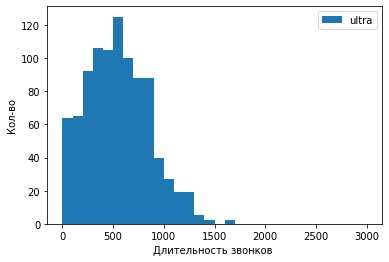

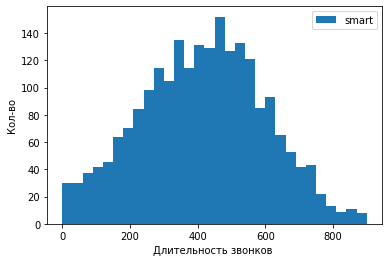

In [36]:
# построим гистограммы по столбцу duration,чтобы увидеть как распределны значения.Range задаем от 1 (тк мы приняли считать 0
# за пропущенные звонки) до границы чуть выше минут включенных в тарифный план, чтобы понять насколько сильно абоненты пере-
# расходуют его 
duration_ultra = plt.hist( x = pivot_ultra_duration['duration'],  bins=30, range=(1, 3000), label  = 'ultra')
plt.ylabel('Кол-во')
plt.xlabel('Длительность звонков ')
plt.legend()
plt.show()
duration_smart = plt.hist(x = pivot_smart_duration['duration'],  bins=30, range=(1, 900), label = 'smart')
plt.ylabel('Кол-во')
plt.xlabel('Длительность звонков ')
plt.legend()

* Так как перед нами не стоит задачи избавиться от выбросов и сделать распределния идеальными ,мы наблюдаем на гистограммах выбросы, которые усложняют картину как и скошенность .Однако если абстрагироваться от них,то можно сказать ,что оба распределения похожи на нормальное.График тарифа ultra скошен вправо.А вот smart обладает отрицательной скошенностью.Абоненты смарт в большинстве своем используют доступный лимит по минутам лишь на 13%, а вот абоненты тарифа смарт ,достачно часто выходят за рамки тарифа на целых 100 минут .

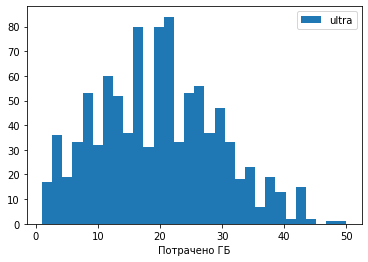

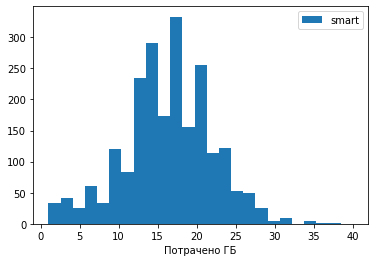

In [37]:
# аналогичным способом посмотрим на использованные ГБ.Границы указываем чуть выше тарифного плана.

pivot_ultra_gb = pd.pivot_table(data_ultra, values = 'gb_used', index = ['user_id', 'month'])
pivot_smart_gb = pd.pivot_table(data_smart, values = 'gb_used', index = ['user_id', 'month'])
ax = plt.hist( x = pivot_ultra_gb['gb_used'],  bins=30, range=(1, 50), label  = 'ultra')
plt.xlabel('Потрачено ГБ')
plt.legend()
plt.show()
bx = plt.hist(x = pivot_smart_gb['gb_used'],  bins=25, range=(1, 40), label = 'smart')
plt.xlabel('Потрачено ГБ')
plt.legend()

* Большинство абонентов тарифа ультра из нашей выборки не перерасходуют включенный в тариф трафик.Несмотря на выбросы распределние нормальное,не сильно скошено вправо.А вот в тарифе смарт, большинство тратит  еще  примерно 5 гб сверх тарифного пакета .Распределние почти идеально нормальное

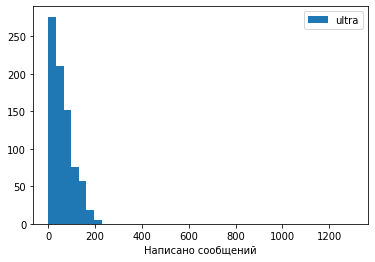

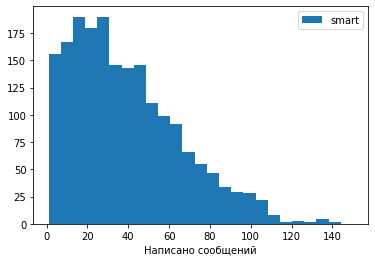

In [38]:
# и сообщения по тому же принципу
pivot_ultra_message = pd.pivot_table(data_ultra, values = 'message_count', index = ['user_id', 'month'])
pivot_smart_message = pd.pivot_table(data_smart, values = 'message_count', index = ['user_id', 'month'])
ax = plt.hist( x = pivot_ultra_message['message_count'],  bins=40, range=(1, 1300), label  = 'ultra')
plt.xlabel('Написано сообщений')
plt.legend()
plt.show()
bx = plt.hist(x = pivot_smart_message['message_count'],  bins=25, range=(1, 150), label = 'smart')
plt.xlabel('Написано сообщений')
plt.legend()

* Наблюдаем следущую  картину :абоненты тарифа ультра с включенными в тариф 1000 сообщений ,в большинстве своем не используют даже 20% включенных в тариф сообщений.А вот абоненты тарифа смарт наооборот -значительно превышают лимит в 50 сообщений.Также сразу видно разница в количестве написанных сообщений .Очевидно что среди абонентов smart  это услуга гораздо популярнее ,чем у абонентов ultra.Это может быть как и исключительная особенность той выборки с которой мы работаем ,так и теденция применимая ко всей генеральной совокупности.Опять же , оба распередления 'можно' назвать нормальнными,из за выбросов скошены вправо ,то есть имеют положительную скошенность.

####  Расчитаем характеристики положения данных по минутам , использованным ГБ и сообщениям в каждом тарифе

In [39]:
# вычислим среднее,медиану ,дисперсию и стандартное отклонение использованных минут за месяц для тарифа Ультра

print(pivot_ultra_duration['duration'].mean())
print(pivot_ultra_duration['duration'].median())
# считаем дисперсию и в параметре ddof = 1 так как работаем с выборкой,а не генеральной совокупностью
print(np.var(pivot_ultra_duration['duration'], ddof=1))
# и стандартное отклонение с тем же параметром
print(np.std(pivot_ultra_duration['duration'], ddof=1))

515.6302186878728
508.0
104439.85715557402
323.17155994235327


In [40]:
# те же самые характеристики найдем и для абонентов тарифа Смарт 
print(pivot_smart_duration['duration'].mean())
print(pivot_smart_duration['duration'].median())
print(np.var(pivot_smart_duration['duration'], ddof=1))
print(np.std(pivot_smart_duration['duration'], ddof=1))

413.48291167332445
419.0
37674.978060434914
194.1004329218122


* Уже на этом этапе можно предположить о различиях в поведении пользователей двух разных тарифов.Так как медиана у нас не сильно отличается от среднего, можем сказать ,что выбросов по этому праметру немного или они компенсируют друг друга. Абонентам тарифа ультра в среднем нужно на 100 минут больше чем абонентам тарифа смарт.И те и те не превышают лимит тарифа.Из за того, что при вычислении диспресии используется возведение в квадрат ,чтобы числа не компенсровали друг друга ,данный праметр разброса не очень информативен для нас,лучше обратим внимание на корень из дисперсии ,то есть стандартное отклонение.Оно показывает насколько сильно могут отличаться значения от ожидаемого среднего.std достаточно большое в обоих тарифах,это значит что шанс встретить в нашей выборке значение, которое на 305 или 183 отличается от среднего,велик.Также с его помощью ,могли бы по правилу трех сигм узнать интервал в котором лежат 99% значений

In [41]:
# вычислим среднее,медиану,дисперсию и стандартное отклонение по написанным за месяц сообщениям для тарифа Ультра

print(pivot_ultra_message['message_count'].mean())
print(pivot_ultra_message['message_count'].median())
print(np.var(pivot_ultra_message['message_count'], ddof=1))
print(np.std(pivot_ultra_message['message_count'], ddof=1))

48.33300198807157
37.0
2287.3686013273596
47.826442490816305


In [42]:
# те же самые характеристики считаем и для абонентов тарифа Smart

print(pivot_smart_message['message_count'].mean())
print(pivot_smart_message['message_count'].median())
print(np.var(pivot_smart_message['message_count'], ddof=1))
print(np.std(pivot_smart_message['message_count'], ddof=1))

33.02840656901908
28.0
800.0720168648236
28.28554430914886


* В сообщениях ,среднее тоже не сильно отличает от медианы.Поэтому можем предположить ,что абонентам тарифа смарт в среднем отправляют на 10-15 сообщений меньше чем пользователи тарифа Ультра.Абоненты последнего в среднем не используют даже 5 % тарифного плана.А вот в тарифе смарт ситуция более адекватная: абоненты имеют запас в 20-25 сообщений.Опять же,дисперсия в силу возведения в квадрат ,не очень нас интересует нас.А вот, посмотрев на стандартное отклонение ,наблюдаем следующую картину: std в тарифе ультра равное 47, при среднем 48,показывает, что значения могут отличаться почти в два раза.Аналогичная картина и в тарифе смарт.

In [43]:
# вычислим среднее,медиану ,дисперсию и стандартное отклонение использованных ГБ за месяц в тарифе Ультра

print(pivot_ultra_gb['gb_used'].mean())
print(pivot_ultra_gb['gb_used'].median())
# считаем дисперсию и в параметре ddof = 1 так как работаем с выборкой,а не генеральной совокупностью
print(np.var(pivot_ultra_gb['gb_used'], ddof=1))
# и стандартное отклонение с тем же параметром
print(np.std(pivot_ultra_gb['gb_used'], ddof=1))

19.08747514910537
19.0
102.83811162873505
10.140912761124367


In [44]:
# те же самые характеристики считаем и для абонентов тарифа Smart

print(pivot_smart_gb['gb_used'].mean())
print(pivot_smart_gb['gb_used'].median())
# считаем дисперсию и в параметре ddof = 1 так как работаем с выборкой,а не генеральной совокупностью
print(np.var(pivot_smart_gb['gb_used'], ddof=1))
# и стандартное отклонение с тем же параметром
print(np.std(pivot_smart_gb['gb_used'], ddof=1))

16.154904571682202
17.0
35.48798326131568
5.957179136245248


* Посмотрев на характеристики положения данных, использованных ГБ можно сказать следующее.Большинство абонентов тарифа Ультра не перерасходуют тарифный план ,даже учитывая среднее отклонение ,онb все равно не достают до верхней границы лимита ,а вот у Смарт все не так хорошо.Они и так,перерасходуют трафик в среднем на 1 ГБ,а учитывая 5-6Гб из стандратного отклонения ,они значительно переплачивают.Такую же картину мы наблюдали и на гистограммах.

### Вывод:

Построили гистограммы по использованным минутам ,ГБ и отправленным сообщениям,на основе которых сделали следующие выводы:
* Абоненты смарт в большинстве своем используют доступный лимит по минутам лишь на 13%, а вот абоненты тарифа смарт ,достачно часто выходят за рамки тарифа на целых 100 минут .
* Большинство абонентов тарифа ультра из нашей выборки не перерасходуют включенный в тариф интернет-трафик.А вот в тарифе смарт, большинство тратит еще примерно 5 гб сверх тарифного пакета.
* абоненты тарифа ультра с включенными в тариф 1000 сообщений ,в большинстве своем не используют даже 20% включенных в тариф сообщений.А вот абоненты тарифа смарт наооборот - значительно превышают лимит в 50 сообщений.

Сформулировать это в одном приложении можно так. Абоненты тарифа Смарт перерасходуют тарифный план по всем показателем, а абоненты тарифа Ультра ,не использует даже большей его части. Также мы рассчитали характеристики положения данных и их разброс по этим же параметрам и убедились в этом выводе.Распределения во всех случаях отнесли к нормальным , однако из за выбросов они имели отрицательную лиюо положительную скошенность.

### Шаг 4. Проверим гипотезы

* Специально сформулируем двухстороннюю гипотезу,чтобы, если мы отвергнем нулевую,нас интересовало отклонения в обе стороны от среднего.Так как у нас нет ,ни среднего генеральной совокупности ,ни самой генеральной совокупности,проверим гипотезы c помощью t-test.Однако для предложенного в тренажере t-test c параметром 1samp все же необходимо среднее генеральной совокупности, которого у нас нет.Поэтому для проверки обеих гипотез проведем ttest_ind для двух независимых выборок.Как результат, тест вернет статистику разности между средними двух выборок(statistic) и двухсторонний уровень значимости(p-value).statistic будет сведельствовать о сходстве / различиях двух выборок, а p-value покажет вероятность того ,что полученные результаты случайны.То есть  вероятность получить наблюдаемый / более далёкий результат при условии, что нулевая гипотеза верна.Именно на основе последнего мы и будем принимать решение овергать или не отвергать нулевую гипотезу.
* уровень статистической значимости(alpha) в обоих тестах — 5%

* Нулевая гипотеза H₀: Cредняя выручка пользователей тарифов «Ультра» и «Смарт» равны между собой
* Альтернативная(двухсторонняя) гипотеза H₁: Cредняя выручка пользователей тарифов «Ультра» и «Смарт» не равны между собой

In [45]:
#для проверки гипотезы создадим обьекты series, c выручкой по пользователям каждого тарифа ,которые предадим как аргументы теста
ttset_ultra = pd.Series(data_ultra['revenue'])
ttset_smart = pd.Series(data_smart['revenue'])

* Сначала проверим дисперсии выборок, чтобы понять с каким параметром equal_var делать T-test

In [46]:
# параметр ddof=1 тк работаем с выборкой
print(np.var(ttset_ultra, ddof=1))
print(np.var(ttset_smart, ddof=1))

138855.04139343047
668420.9717349435


* Вручную посчитав дисперсию видим , что они существенно отличаются.Поэтому в тесте укажем параметр equal_var=False, который примет дисперсии двух выборок не как равные.

In [47]:
#from scipy import stats as st
#from scipy.stats import ttest_ind
alpha = .05
results = st.ttest_ind(ttset_ultra, ttset_smart, equal_var=False)# equal_var=True сделаем выборки одинаковыми по размеру
print(results)
print()
if ( results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

Ttest_indResult(statistic=37.67706881767835, pvalue=3.6959751806665007e-258)

Отвергаем нулевую гипотезу


* На основе получившихся результатов, отвергаем нулевую гипотезу о равенсте двух средних.Хоть и логически кажется очевидным, что выручка с пользователей разных тарифов будет разная, однако мы рассматриваем это с точки статистической гипотезы,а не нашей интуции.Поэтому у нас нет оснований утверждать что наша гипотеза доказана или опровергнута,мы лишь отвергли ее.

Сформулируем нулевую и альтернативную гипотезы:
* Нулевая гипотеза H₀: Cредняя выручка пользователей из Москвы и других населенных пунктов равны между собой
* Альтернативная(двухсторонняя) гипотеза H₁: Cредняя выручка пользователей из Москвы и абонентов из других населенных пунктов не равны между собой

In [48]:
# c помощью query создадим два среза с данными только по Москве и без Москвы
moscow_report = data_report.query('city == "Москва"')
not_moscow_report = data_report.query('city != "Москва"')
# Также преобразовываем их в обьекты Series
moscow = pd.Series(moscow_report['revenue'])
not_moscow = pd.Series(not_moscow_report['revenue'])

* Также проверяем дисперсии выборок, чтобы понять с каким параметром equal_var делать T-test

In [49]:
# параметр ddof=1 тк работаем с выборкой
print(np.var(moscow, ddof=1))
print(np.var(not_moscow, ddof=1))

563757.406198696
653707.1031424621


* Почитав дисперсию, что допустимые отклонения между ними существенны.Поэтому в тесте укажем параметр equal_var=False, который примет дисперсии двух выборок как разные

In [50]:
alpha = .05
results = st.ttest_ind(moscow, not_moscow, equal_var=False)
print(results)
print()
if ( results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

Ttest_indResult(statistic=0.8034270065320763, pvalue=0.42192271461069364)

Не отвергаем нулевую гипотезу


*На основе получившихся результатов ,не отвергаем нулевую гипотезу о равенстве двух средних.Однако напомним ,что это не доказывает ее и не опровергает.Мы лишь не отвергаем ее.

### Вывод:

* Выбрали тест.Сформулировали нулевую и альтернативную гипотезы о равенстве двух средних.В результате первого теста отвергли нулевую гипотезу. В результате второго теста нулевая гипотеза не отвергнута.

### Шаг 5. Напишем общий вывод

В рамках данного проекта мы:
* Предобработали данные
* Нашли и исправили ошибки 
* Обьединили в одну таблицу 
* Расситчали выручку с каждого пользователя
* Изучили насколько реально расходуют абоненты тарифный план
* Построили гистограммы и рассчитаи характеристики положения данных
* Сформулировали, протестировали и отвергли гипотезы и многое другое
На основе имеющейся выборки, которую мы изучили ,я считаю, что лучшее что мы сможем сделать - это утсановить опитальные рамки ,на основе тех данных ,что мы получили.При таких рамках не будет большой преплаты у абонентов тарифа Смарт ,а обоненты тарифа Ультра не будут платить за услуги,которые в польной мере не используют. Конечно, эти новые парметры мы устанавливаем с верой в добросоветсность компании.Ведь им выгоднее, чтобы абоненты платили за самые дорогой тариф ,даже если он им не нужен , и чтобы докупали трафик и минуты после того как их лимит будет исчерпан.И конечно же , эти новые рамки могут быть совсем не применимы ко всем абонентам этих тарифов .Мы можем утверждать в чем то, только для этой выборки 